# Identificação de Scaffolds Promissores com Aprendizado de Máquina
Este notebook realiza o pré-processamento de scaffolds de fármacos, gera fingerprints moleculares e treina um modelo de Random Forest para prever indicações terapêuticas.

In [ ]:
import pandas as pd

# Carregar o arquivo pulando a primeira linha e usando a segunda como header
df = pd.read_excel("/content/scaffolds_of_known_drugs.xlsx", header=1)

In [ ]:
df.head()

,Drug ID,Name,SMILES,Scaffold ID,Scaffold SMILES,Indication
0,CHEMBL1566,ACARBOSE,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,SCAFFB1,C1CCC(CC2CCC(CC3CCC(CC4CCCCC4)CC3)CC2)CC1,"Diabetes Mellitus | Diabetes Mellitus, Type 2"
1,CHEMBL20,ACETAZOLAMIDE,CC(=O)Nc1nnc(S(N)(=O)=O)s1,SCAFFB2,C1CCCC1,Altitude Sickness | Edema | Epilepsy | Glaucom...
2,CHEMBL1131,ACITRETIN,COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C,SCAFFB3,C1CCCCC1,Psoriasis
3,CHEMBL1173655,AFATINIB,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,SCAFFB4,C1CCC(CC2CCCC3CC(CC4CCCC4)CCC23)CC1,"Carcinoma, Non-Small-Cell Lung | Neoplasms"
4,CHEMBL714,ALBUTEROL,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1,SCAFFB3,C1CCCCC1,"Asthma | Asthma, Exercise-Induced | Bronchial ..."


In [ ]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Scaffolds import MurckoScaffold

# Função para validar SMILES e gerar scaffold
def preprocess_data(df):
    # Função para validar SMILES
    def validate_smiles(smiles):
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None

    # Função para extrair o scaffold (usando Murcko Scaffold)
    def get_scaffold(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Gerando o scaffold usando Murcko Scaffold
            scaffold = MurckoScaffold.GetScaffoldForMol(mol)
            # Gerando SMILES do scaffold
            return Chem.MolToSmiles(scaffold)
        else:
            return None

    # Validando SMILES e gerando scaffold
    df['valid_smiles'] = df['SMILES'].apply(validate_smiles)
    df['scaffold_smiles'] = df['SMILES'].apply(get_scaffold)

    # Filtrando apenas moléculas válidas
    df = df[df['valid_smiles'] == True]

    return df

# Exemplo de uso com seu dataset
# df = pd.read_csv("path_to_your_data.csv")  # carrega o dataset
df = preprocess_data(df)  # Pré-processa os dados


[14:41:05] WARNING: not removing hydrogen atom without neighbors
[14:41:05] WARNING: not removing hydrogen atom without neighbors
[14:41:05] WARNING: not removing hydrogen atom without neighbors
[14:41:05] WARNING: not removing hydrogen atom without neighbors
[14:41:07] WARNING: not removing hydrogen atom without neighbors
[14:41:07] WARNING: not removing hydrogen atom without neighbors
[14:41:07] WARNING: not removing hydrogen atom without neighbors
[14:41:07] WARNING: not removing hydrogen atom without neighbors


In [ ]:
df

,Drug ID,Name,SMILES,Scaffold ID,Scaffold SMILES,Indication,valid_smiles,scaffold_smiles
0,CHEMBL1566,ACARBOSE,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,SCAFFB1,C1CCC(CC2CCC(CC3CCC(CC4CCCCC4)CC3)CC2)CC1,"Diabetes Mellitus | Diabetes Mellitus, Type 2",True,C1=C[C@H](N[C@H]2CC[C@@H](O[C@H]3CC[C@@H](O[C@...
1,CHEMBL20,ACETAZOLAMIDE,CC(=O)Nc1nnc(S(N)(=O)=O)s1,SCAFFB2,C1CCCC1,Altitude Sickness | Edema | Epilepsy | Glaucom...,True,c1nncs1
2,CHEMBL1131,ACITRETIN,COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C,SCAFFB3,C1CCCCC1,Psoriasis,True,c1ccccc1
3,CHEMBL1173655,AFATINIB,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,SCAFFB4,C1CCC(CC2CCCC3CC(CC4CCCC4)CCC23)CC1,"Carcinoma, Non-Small-Cell Lung | Neoplasms",True,c1ccc(Nc2ncnc3cc(O[C@H]4CCOC4)ccc23)cc1
4,CHEMBL714,ALBUTEROL,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1,SCAFFB3,C1CCCCC1,"Asthma | Asthma, Exercise-Induced | Bronchial ...",True,c1ccccc1
...,...,...,...,...,...,...,...,...
1150,CHEMBL589586,MONOMETHYL FUMARATE,COC(=O)/C=C/C(=O)O,SCAFFB28,NaN,Multiple Sclerosis,True,
1151,CHEMBL4594271,BEROTRALSTAT,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...,SCAFFB519,C1CCC(C2CCCC2CCC2CCCC(C(CCC3CC3)C3CCCCC3)C2)CC1,"Angioedemas, Hereditary",True,O=C(Nc1cccc(C(NCC2CC2)c2ccccc2)c1)c1ccnn1-c1cc...
1152,CHEMBL2338675,FOSDENOPTERIN,Nc1nc(=O)c2c([nH]1)N[C@@H]1O[C@@H]3COP(=O)(O)O...,SCAFFB116,C1CCC2CC3CC4CCCCC4CC3CC2C1,"Metal Metabolism, Inborn Errors",True,O=c1nc[nH]c2c1N[C@H]1C[C@H]3O[PH](=O)OC[C@H]3O...
1153,CHEMBL4297412,PAFOLACIANINE,CC1(C)C(/C=C/C2=C(Oc3ccc(C[C@H](NC(=O)c4ccc(NC...,SCAFFB520,C(CCC1CCC(CC2C(CCC3CC4CCCCC4C3)CCCC2CCC2CC3CCC...,Multiple Sclerosis,True,O=C(NCCc1ccc(OC2=C(/C=C/C3=[NH+]c4ccccc4C3)CCC...


In [ ]:
import numpy as np

# Função para criar vocabulário
def build_vocab(smiles_list):
    vocab = set()
    for smiles in smiles_list:
        vocab.update(list(smiles))  # Adiciona cada caractere único de SMILES
    return sorted(vocab)

# Função para tokenizar os SMILES
def tokenize_smiles(smiles, vocab):
    tokenized = [vocab.index(c) for c in smiles if c in vocab]
    return tokenized

# Construção do vocabulário com base no conjunto de SMILES
smiles_vocab = build_vocab(df['SMILES'])

# Tokenizando os SMILES
df['smiles_tokens'] = df['SMILES'].apply(lambda x: tokenize_smiles(x, smiles_vocab))

# Exemplo de tokenização para scaffold também (se necessário)
df['scaffold_tokens'] = df['scaffold_smiles'].apply(lambda x: tokenize_smiles(x, smiles_vocab))

# Visualizando os dados
print(df[['SMILES', 'smiles_tokens', 'scaffold_smiles', 'scaffold_tokens']].head())


                                              SMILES  \
0  C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...   
1                         CC(=O)Nc1nnc(S(N)(=O)=O)s1   
2   COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C   
3  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...   
4                      CC(C)(C)NCC(O)c1ccc(O)c(CO)c1   

                                       smiles_tokens  \
0  [20, 31, 20, 17, 22, 33, 7, 27, 31, 20, 17, 22...   
1  [20, 20, 1, 16, 27, 2, 26, 35, 7, 38, 38, 35, ...   
2  [20, 27, 35, 7, 35, 35, 1, 20, 2, 35, 1, 6, 20...   
3  [20, 26, 1, 20, 2, 20, 6, 20, 16, 20, 6, 20, 1...   
4  [20, 20, 1, 20, 2, 1, 20, 2, 26, 20, 20, 1, 27...   

                                     scaffold_smiles  \
0  C1=C[C@H](N[C@H]2CC[C@@H](O[C@H]3CC[C@@H](O[C@...   
1                                            c1nncs1   
2                                           c1ccccc1   
3            c1ccc(Nc2ncnc3cc(O[C@H]4CCOC4)ccc23)cc1   
4                                           c1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

smiles_data = df['smiles_tokens']

encoder = OneHotEncoder(sparse_output=False)
indications_data = encoder.fit_transform(df[['Indication']])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Converte as listas para arrays com mesmo tamanho (preenchendo com 0s no final)
x_train = pad_sequences(smiles_data.tolist(), padding='post')  # ou padding='pre'

# E indications_data é um array one-hot codificado:
y_train = np.array(indications_data, dtype=np.float32)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np

# Gerador: Recebe ruído z, scaffold e indicação como entrada
def build_generator(z_dim, scaffold_dim, indication_dim):
    input_z = layers.Input(shape=(z_dim,))
    input_scaffold = layers.Input(shape=(scaffold_dim,))
    input_indication = layers.Input(shape=(indication_dim,))

    x = layers.Concatenate()([input_z, input_scaffold, input_indication])  # Combina entradas
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(1024, activation='relu')(x)

    output = layers.Dense(len(smiles_vocab), activation='softmax')(x)  # Produz uma distribuição sobre o vocabulário
    model = models.Model([input_z, input_scaffold, input_indication], output)

    return model

def build_discriminator(scaffold_dim, indication_dim, max_sequence_length):
    input_molecule = layers.Input(shape=(max_sequence_length,))  # Sequência de tokens SMILES com comprimento fixo
    input_scaffold = layers.Input(shape=(scaffold_dim,))
    input_indication = layers.Input(shape=(indication_dim,))

    x = layers.Embedding(input_dim=len(smiles_vocab), output_dim=256)(input_molecule)  # Embedding dos SMILES
    x = layers.LSTM(512)(x)  # LSTM para capturar a sequência
    x = layers.Concatenate()([x, input_scaffold, input_indication])
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)  # Classificação binária

    model = tf.keras.models.Model([input_molecule, input_scaffold, input_indication], output)

    return model


"""
# Discriminador: Recebe a molécula gerada, scaffold e indicação
def build_discriminator(scaffold_dim, indication_dim):
    input_molecule = layers.Input(shape=(None,))  # Sequência de tokens (SMILES)
    input_scaffold = layers.Input(shape=(scaffold_dim,))
    input_indication = layers.Input(shape=(indication_dim,))

    x = layers.Embedding(input_dim=len(smiles_vocab), output_dim=256)(input_molecule)  # Embedding dos SMILES
    x = layers.LSTM(512)(x)  # LSTM para capturar a sequência
    x = layers.Concatenate()([x, input_scaffold, input_indication])
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)  # Classificação binária

    model = models.Model([input_molecule, input_scaffold, input_indication], output)

    return model

"""

# Definindo os tamanhos de entrada
z_dim = 100  # Dimensão do vetor de ruído
scaffold_dim = len(smiles_vocab)  # Número de tokens únicos (SMILES)
indication_dim = 10  # Exemplo: uma representação one-hot de 10 indicações

# Construindo os modelos
generator = build_generator(z_dim, scaffold_dim, indication_dim)
discriminator = build_discriminator(scaffold_dim, indication_dim, max_sequence_length = 100 )

# Compilando os modelos
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Criando o modelo GAN (gerador + discriminador)
discriminator.trainable = False  # O discriminador será congelado durante o treinamento do gerador

input_z = layers.Input(shape=(z_dim,))
input_scaffold = layers.Input(shape=(scaffold_dim,))
input_indication = layers.Input(shape=(indication_dim,))

generated_smiles = generator([input_z, input_scaffold, input_indication])
validity = discriminator([generated_smiles, input_scaffold, input_indication])

gan_model = models.Model([input_z, input_scaffold, input_indication], validity)
gan_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Função para treinar a GAN
def train_gan(generator, discriminator, gan_model, epochs, batch_size, x_train, y_train):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Treinando o discriminador
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_molecules = x_train[idx]
        real_labels = y_train[idx]

        noise = np.random.normal(0, 1, (half_batch, z_dim))
        generated_molecules = generator.predict([noise, real_molecules, real_labels])

        # Treinando o discriminador com as amostras reais (label 1) e as amostras geradas (label 0)
        discriminator_loss_real = discriminator.train_on_batch([real_molecules, real_labels], np.ones((half_batch, 1)))
        discriminator_loss_fake = discriminator.train_on_batch([generated_molecules, real_labels], np.zeros((half_batch, 1)))

        # Calculando a perda do discriminador
        d_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        # Treinando o gerador (o discriminador está congelado durante esta fase)
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan_model.train_on_batch([noise, real_molecules, real_labels], np.ones((batch_size, 1)))

        # Imprimindo as perdas a cada 1000 épocas (ajuste conforme necessário)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss[0]}")

# Ajuste os parâmetros de treinamento conforme necessário
train_gan(generator, discriminator, gan_model, epochs=10000, batch_size=64, x_train=x_train, y_train=y_train)


ValueError: Input 0 of layer "functional_25" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 42)

In [ ]:
import numpy as np

# Exemplo de tamanho do vocabulário (SMILES)
len_smiles_vocab = len(smiles_vocab)

# Gerar amostra para z (vetor de ruído)
z = np.random.randn(1, z_dim)  # Vetor de ruído com distribuição normal

# Gerar amostra para scaffold (aqui estou assumindo que você tem um vetor scaffold)
# Scaffold pode ser representado de várias maneiras, aqui usamos um vetor aleatório como exemplo
scaffold = np.random.randn(1, scaffold_dim)

# Gerar amostra para indicação (vetor de indicações, aqui um exemplo de one-hot encoding)
indication = np.random.randn(1, indication_dim)  # Representação aleatória da indicação

# Gerar SMILES com o gerador
generated_smiles_probs = generator.predict([z, scaffold, indication])

# Amostrar da distribuição gerada para obter a sequência SMILES final
# Aqui estou usando argmax para pegar o token de maior probabilidade em cada passo, mas você pode usar outras estratégias, como amostragem estocástica
generated_smiles_tokens = np.argmax(generated_smiles_probs, axis=-1)

# Para garantir que seja uma sequência e não um valor escalar
generated_smiles_tokens = generated_smiles_tokens.flatten()

# Converter os tokens de volta para SMILES (assumindo que você tem uma função de mapeamento)
generated_smiles = ''.join([smiles_vocab[token] for token in generated_smiles_tokens])

print("Molécula gerada:", generated_smiles)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Molécula gerada: \


In [ ]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

def calculate_molecular_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Calcula a lipofilicidade (logP)
        logP = rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
        # Calcula o número de átomos
        num_atoms = mol.GetNumAtoms()
        return logP, num_atoms
    return None, None

# Exemplo de molécula gerada
smiles = 'CCO'
logP, num_atoms = calculate_molecular_properties(smiles)
print(f"LogP: {logP}, Número de Átomos: {num_atoms}")


LogP: -0.0014000000000000123, Número de Átomos: 3


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 14.4 MB/s eta 0:00:00


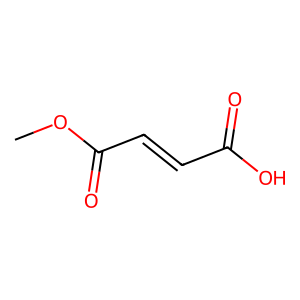

In [ ]:

from rdkit import Chem
from rdkit.Chem import Draw


#smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
smiles = "COC(=O)/C=C/C(=O)O"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

#T5 gpt - lstm - transformer

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import pandas as pd

# Carregar o arquivo pulando a primeira linha e usando a segunda como header
df = pd.read_excel("/content/scaffolds_of_known_drugs.xlsx", header=1)

In [ ]:
df.head(5)

,Drug ID,Name,SMILES,Scaffold ID,Scaffold SMILES,Indication
0,CHEMBL1566,ACARBOSE,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,SCAFFB1,C1CCC(CC2CCC(CC3CCC(CC4CCCCC4)CC3)CC2)CC1,"Diabetes Mellitus | Diabetes Mellitus, Type 2"
1,CHEMBL20,ACETAZOLAMIDE,CC(=O)Nc1nnc(S(N)(=O)=O)s1,SCAFFB2,C1CCCC1,Altitude Sickness | Edema | Epilepsy | Glaucom...
2,CHEMBL1131,ACITRETIN,COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C,SCAFFB3,C1CCCCC1,Psoriasis
3,CHEMBL1173655,AFATINIB,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,SCAFFB4,C1CCC(CC2CCCC3CC(CC4CCCC4)CCC23)CC1,"Carcinoma, Non-Small-Cell Lung | Neoplasms"
4,CHEMBL714,ALBUTEROL,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1,SCAFFB3,C1CCCCC1,"Asthma | Asthma, Exercise-Induced | Bronchial ..."


In [ ]:
# ✅ Dados de exemplo
data = [{"indication": i, "scaffold": s} for i, s in zip(df['Indication'], df['Scaffold SMILES'])]

In [ ]:
data[0:5]

[{'indication': 'Diabetes Mellitus | Diabetes Mellitus, Type 2',
  'scaffold': 'C1CCC(CC2CCC(CC3CCC(CC4CCCCC4)CC3)CC2)CC1'},
 {'indication': 'Altitude Sickness | Edema | Epilepsy | Glaucoma | Glaucoma, Angle-Closure | Heart Failure | Seizures',
  'scaffold': 'C1CCCC1'},
 {'indication': 'Psoriasis', 'scaffold': 'C1CCCCC1'},
 {'indication': 'Carcinoma, Non-Small-Cell Lung | Neoplasms',
  'scaffold': 'C1CCC(CC2CCCC3CC(CC4CCCC4)CCC23)CC1'},
 {'indication': 'Asthma | Asthma, Exercise-Induced | Bronchial Spasm | Lung Diseases, Obstructive | Pulmonary Disease, Chronic Obstructive',
  'scaffold': 'C1CCCCC1'}]

In [ ]:
data = [d for d in data if isinstance(d["scaffold"], str)]

In [ ]:
!pip install selfies rdkit pandas scikit-learn torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
import selfies as sf
from rdkit import Chem
from rdkit.Chem import QED, Crippen
import random


# ✅ Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ✅ SELFIES e vocabulário
for d in data:
    d["selfies"] = sf.encoder(d["scaffold"])

all_chars = set()
for d in data:
    tokens = list(sf.split_selfies(d["selfies"]))
    all_chars.update(tokens)

char2idx = {c: i + 1 for i, c in enumerate(sorted(all_chars))}
char2idx["<pad>"] = 0
idx2char = {i: c for c, i in char2idx.items()}




# ✅ Embeddings
encoder = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
indication_embeddings = encoder.encode([d["indication"] for d in data])

# ✅ Dataset e DataLoader
class ScaffoldDataset(torch.utils.data.Dataset):
    def __init__(self, data, indication_embeddings, char2idx, max_len=40):
        self.data = data
        self.embeddings = indication_embeddings
        self.char2idx = char2idx
        self.max_len = max_len

    def __len__(self): return len(self.data)

    def __getitem__(self, idx):
        vec = self.embeddings[idx]
        target = [self.char2idx[c] for c in sf.split_selfies(self.data[idx]["selfies"])]
        if len(target) < self.max_len:
            target += [self.char2idx["<pad>"]] * (self.max_len - len(target))
        else:
            target = target[:self.max_len]
        return torch.tensor(vec, dtype=torch.float32), torch.tensor(target)

dataset = ScaffoldDataset(data, indication_embeddings, char2idx)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# ✅ Modelo
class ScaffoldTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size, max_len=40):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, hidden_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.out = nn.Linear(hidden_size, vocab_size)
        self.max_len = max_len

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, self.max_len, 1) + self.pos_embedding[:, :self.max_len, :].to(x.device)
        x = self.transformer(x)
        return self.out(x)

# ✅ Inicializar
input_dim = indication_embeddings[0].shape[0]
model = ScaffoldTransformer(input_dim, 128, len(char2idx)).to(device)
model.load_state_dict(torch.load("/content/scaffold_transformer_rl.pth", map_location=device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# ✅ Decodificação SELFIES
def decode_selfies(indices):
    tokens = [idx2char[i] for i in indices if i in idx2char and i != char2idx["<pad>"]]
    selfies = "".join(tokens)
    try:
        smiles = sf.decoder(selfies)
    except:
        smiles = ""
    return smiles

# ✅ Recompensa
def calc_reward(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return 0.0
    qed = QED.qed(mol)
    logp = Crippen.MolLogP(mol)
    return qed + 0.1 * logp  # Exemplo de recompensa combinada

# ✅ Loop de Reinforcement Learning
def reinforce_step(model, optimizer, batch_size=4):
    model.train()
    log_probs, rewards = [], []

    for _ in range(batch_size):
        idx = random.randint(0, len(data) - 1)
        emb = torch.tensor(indication_embeddings[idx], dtype=torch.float32).unsqueeze(0).to(device)
        logits = model(emb)
        probs = F.softmax(logits, dim=-1)
        dist = torch.distributions.Categorical(probs)
        sampled = dist.sample()
        log_prob = dist.log_prob(sampled)
        smiles = decode_selfies(sampled[0].tolist())
        reward = calc_reward(smiles)
        log_probs.append(log_prob.sum())
        rewards.append(torch.tensor(reward, dtype=torch.float32).to(device))

    loss = -torch.stack(log_probs) * torch.stack(rewards)
    loss = loss.mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item(), rewards

# ✅ Treinamento combinado
for epoch in range(200+int(1)):
    model.train()
    # Fase Supervisionada
    if epoch % 10 != 0:
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = loss_fn(out.view(-1, out.shape[-1]), y.view(-1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"[Epoch {epoch}] Supervised Loss: {loss.item():.4f}")
    else:
        # Fase REINFORCE
        rl_loss, rewards = reinforce_step(model, optimizer)
        avg_reward = torch.tensor(rewards).mean().item()
        print(f"[Epoch {epoch}] RL Loss: {rl_loss:.4f} | Avg Reward: {avg_reward:.4f}")


torch.save({"epoch": epoch,"model_state": model.state_dict(),"optimizer_state": optimizer.state_dict(),}, "checkpoint_rl.pth")
torch.save(model.state_dict(), "scaffold_transformer_rl.pth")

In [ ]:
all_chars = set()
for d in data:
    tokens = list(sf.split_selfies(d["selfies"]))
    all_chars.update(tokens)

char2idx = {c: i + 1 for i, c in enumerate(sorted(all_chars))}
char2idx["<pad>"] = 0
idx2char = {i: c for c, i in char2idx.items()}

print(len(all_chars))

19


###### Continuar neste ***********************************


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import selfies as sf
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import random

# ✅ Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# ✅ Convertemos SMILES para SELFIES
for d in data:
    d["selfies"] = sf.encoder(d["scaffold"])

# ✅ Construção do vocabulário SELFIES
all_chars = set()
for d in data:
    tokens = list(sf.split_selfies(d["selfies"]))
    all_chars.update(tokens)

char2idx = {c: i + 1 for i, c in enumerate(sorted(all_chars))}
char2idx["<pad>"] = 0
idx2char = {i: c for c, i in char2idx.items()}


"""
# ✅ Tokenizador de indication (BOW simples)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([d["indication"] for d in data]).toarray()
"""

from sentence_transformers import SentenceTransformer

# 1. Carregar modelo
encoder = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 2. Calcular embeddings
indication_texts = [d["indication"] for d in data]
indication_embeddings = encoder.encode(indication_texts)



# ✅ Dataset PyTorch
class ScaffoldDataset(Dataset):
    def __init__(self, data, vectorizer, char2idx, max_len=40):
        self.data = data
        self.vectorizer = vectorizer
        self.char2idx = char2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        vec = self.vectorizer.transform([self.data[idx]["indication"]]).toarray()[0]
        target = [self.char2idx[c] for c in sf.split_selfies(self.data[idx]["selfies"])]
        if len(target) < self.max_len:
            target += [self.char2idx["<pad>"]] * (self.max_len - len(target))
        else:
            target = target[:self.max_len]
        return torch.tensor(vec, dtype=torch.float32), torch.tensor(target)

class ScaffoldDataset(Dataset):
    def __init__(self, data, indication_embeddings, char2idx, max_len=40):
        self.data = data
        self.embeddings = indication_embeddings  # embeddings já calculados
        self.char2idx = char2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Embedding da indicação já está pronto
        vec = self.embeddings[idx]

        # Tokenização da SELFIES
        target = [self.char2idx[c] for c in sf.split_selfies(self.data[idx]["selfies"])]
        if len(target) < self.max_len:
            target += [self.char2idx["<pad>"]] * (self.max_len - len(target))
        else:
            target = target[:self.max_len]

        return torch.tensor(vec, dtype=torch.float32), torch.tensor(target)

# 3. Passar para o dataset
dataset = ScaffoldDataset(data, indication_embeddings, char2idx)
#dataset = ScaffoldDataset(data, vectorizer, char2idx)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# ✅ Modelo simples: indication → SELFIES
class ScaffoldGen(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, 40, 1)  # 40 tokens
        x, _ = self.lstm(x)
        return self.out(x)


# ✅ Modelo com 2 camadas LSTM: indication → SELFIES
class ScaffoldLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size, num_layers=2, max_len=40):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.out = nn.Linear(hidden_size, vocab_size)
        self.max_len = max_len

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, self.max_len, 1)
        x, _ = self.lstm(x)
        return self.out(x)


class ScaffoldGenSuper(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size, num_layers=2, dropout=0.2):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # BatchNorm após a primeira camada
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Segunda camada densa
        self.dropout = nn.Dropout(dropout)

        # LSTM com múltiplas camadas e dropout
        self.lstm = nn.LSTM(
            hidden_size,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )

        # Camada de saída
        self.out = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, vocab_size)
        )

    def forward(self, x):
        # Camadas densas iniciais
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))

        # Repetir para a sequência (40 tokens)
        x = x.unsqueeze(1).repeat(1, 40, 1)

        # Passar pelo LSTM
        x, _ = self.lstm(x)

        # Camada de saída
        return self.out(x)



# ✅ Modelo Transformer: indication → SELFIES
class ScaffoldTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size, max_len=40):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, hidden_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.out = nn.Linear(hidden_size, vocab_size)
        self.max_len = max_len

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, self.max_len, 1) + self.pos_embedding[:, :self.max_len, :].to(device)
        x = self.transformer(x)
        return self.out(x)

input_dim = indication_embeddings[0].shape[0]
#indication_embeddings.shape[1]
model = ScaffoldTransformer(input_dim, 128, len(char2idx)).to(device)
#model = ScaffoldGen(X.shape[1], 128, len(char2idx)).to(device)
#model = ScaffoldGenSuper(X.shape[1], 128, len(char2idx)).to(device)
#model = ScaffoldLSTM(X.shape[1], 128, len(char2idx)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
loss_fn = nn.CrossEntropyLoss()

#model.load_state_dict(torch.load("/content/scaffold_transformer.pth", map_location=device))

loss_ = []
# ✅ Treinamento
for epoch in range(200+1):
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        loss = loss_fn(out.view(-1, out.shape[-1]), y.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")
        loss_.append(loss.item())

#torch.save({"epoch": epoch,"model_state": model.state_dict(),"optimizer_state": optimizer.state_dict(),}, "checkpoint.pth")
#torch.save(model.state_dict(), "scaffold_transformer.pth")

Usando dispositivo: cpu
Epoch 0 - Loss: 1.6205
Epoch 10 - Loss: 1.4352
Epoch 20 - Loss: 1.5369
Epoch 30 - Loss: 1.3766
Epoch 40 - Loss: 1.3169
Epoch 50 - Loss: 1.5173
Epoch 60 - Loss: 1.4071
Epoch 70 - Loss: 1.6013
Epoch 80 - Loss: 1.7191
Epoch 90 - Loss: 1.6708
Epoch 100 - Loss: 1.4807
Epoch 110 - Loss: 1.7037
Epoch 120 - Loss: 1.7912
Epoch 130 - Loss: 1.7408
Epoch 140 - Loss: 1.6894
Epoch 150 - Loss: 1.5534
Epoch 160 - Loss: 1.5623
Epoch 170 - Loss: 1.6748
Epoch 180 - Loss: 1.1695
Epoch 190 - Loss: 1.4532
Epoch 200 - Loss: 1.2775



📌 Indication: Diabetes Mellitus | Diabetes Mellitus, Type 2
🔣 SELFIES: [C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C]
🧪 SMILES : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


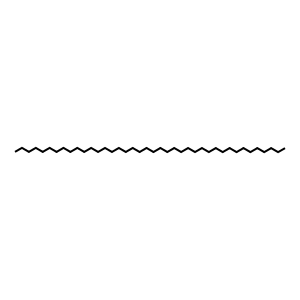


📌 Indication: Diabetes Mellitus
🔣 SELFIES: [C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C]
🧪 SMILES : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


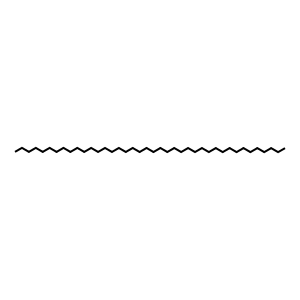


📌 Indication: Cardiovascular Diseases
🔣 SELFIES: [C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C]
🧪 SMILES : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


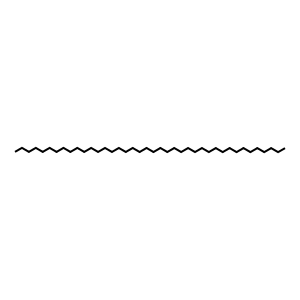


📌 Indication: Hypertension
🔣 SELFIES: [C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C]
🧪 SMILES : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


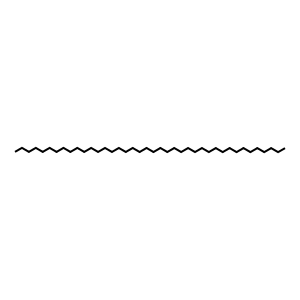

In [ ]:
def generate_selfies(indication):
    model.eval()
    x = encoder.encode([indication])  # Usa a indicação recebida
    x = torch.tensor(x, dtype=torch.float32).to(device)  # Converte e move para o device

    with torch.no_grad():
        out = model(x)
        preds = out.argmax(dim=-1)[0].tolist()
        tokens = [idx2char[i] for i in preds if i != char2idx["<pad>"]]
        selfies_str = "".join(tokens)
        try:
            smiles = sf.decoder(selfies_str)
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                print(f"\n📌 Indication: {indication}")
                print(f"🔣 SELFIES: {selfies_str}")
                print(f"🧪 SMILES : {smiles}")
                img = Draw.MolToImage(mol, size=(300, 300))
                display(img)
            else:
                print(f"[ERRO] Mol inválido: {smiles}")
        except Exception as e:
            print(f"[DECODER ERROR] {e}")

# ✅ Testes
generate_selfies("Diabetes Mellitus | Diabetes Mellitus, Type 2")
generate_selfies("Diabetes Mellitus")
generate_selfies("Cardiovascular Diseases")
generate_selfies("Hypertension")  # Indicação nova

In [ ]:
# ✅ Função de geração: Indication → SELFIES → SMILES → Imagem
def generate_selfies(indication):
    model.eval()
    x = torch.tensor(vectorizer.transform([indication]).toarray(), dtype=torch.float32)
    with torch.no_grad():
        x = x.to(device)
        out = model(x)
        preds = out.argmax(dim=-1)[0].tolist()
        tokens = [idx2char[i] for i in preds if i != char2idx["<pad>"]]
        selfies_str = "".join(tokens)
        try:
            smiles = sf.decoder(selfies_str)
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                print(f"\n📌 Indication: {indication}")
                print(f"🔣 SELFIES: {selfies_str}")
                print(f"🧪 SMILES : {smiles}")
                img = Draw.MolToImage(mol, size=(300, 300))
                display(img)
            else:
                print(f"[ERRO] Mol inválido: {smiles}")
        except Exception as e:
            print(f"[DECODER ERROR] {e}")

# ✅ Testes
generate_selfies("Diabetes Mellitus | Diabetes Mellitus, Type 2")
generate_selfies("Diabetes Mellitus")
#generate_selfies("Cardiovascular Diseases")
#generate_selfies("Hypertension")  # Indicação nova

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)

In [ ]:
dataset

Dataset({
    features: ['Drug ID', 'Name', 'SMILES', 'Scaffold ID', 'Scaffold SMILES', 'Indication'],
    num_rows: 1155
})

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_name = "t5-small"  # ou t5-base / ptt5-base-portuguese-vocab se estiver em português
tokenizer = T5Tokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["Indication"], text_target=example["SMILES"],
                     padding="max_length", truncation=True, max_length=250)

tokenized_dataset = dataset.map(tokenize_function, batched=False)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/1155 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")


model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)

training_args = TrainingArguments(
    output_dir="./scaffold-generator",
    per_device_train_batch_size=16,
    num_train_epochs=50,
    learning_rate=3e-4,
    logging_steps=1,
    save_strategy="no"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
)

#trainer.train()


Usando dispositivo: cpu


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer.train()

In [ ]:
input_text = "Diabetes Mellitus"
inputs = tokenizer(input_text, return_tensors="pt", padding=True).to(model.device)

output = model.generate(**inputs, max_length=64)
scaffold_smiles = tokenizer.decode(output[0], skip_special_tokens=True)

print("Scaffold gerado:", scaffold_smiles)


Scaffold gerado: CC(C)(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CO)NC


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 25.1 MB/s eta 0:00:00


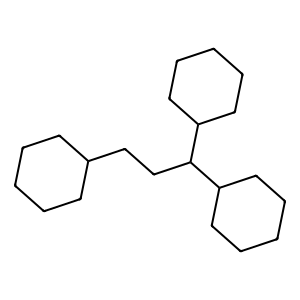

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw


#smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
#smiles = "COC(=O)/C=C/C(=O)O"
mol = Chem.MolFromSmiles("C1CCC(CCC(C2CCCCC2)C2CCCCC2)CC1")
#mol = Chem.MolFromSmiles("C1CCC(CCC2CCC(C3CCCCC3)CC2)CC1")
Draw.MolToImage(mol)

#ChemBERTa é uma ferramenta de avaliação quantitativa e qualitativa para moléculas geradas por um modelo

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
model = AutoModel.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
model.eval()

def embed_smiles(smiles):
    tokens = tokenizer(smiles, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens).last_hidden_state
    return output.mean(dim=1).squeeze().numpy()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/9.43k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/179M [00:00<?, ?B/s]

In [ ]:
generated_smiles = ["CCO", "CCC(=O)O", "C1=CC=CC=C1O"] # Exemplo: lista de SMILES gerados
gen_embeddings = np.array([embed_smiles(s) for s in generated_smiles])

In [ ]:
# Exemplo: SMILES reais do seu dataset
real_smiles = ["CCO", "CCN", "C1=CC=CC=C1"]
real_embeddings = np.array([embed_smiles(s) for s in real_smiles])


In [ ]:
# Distância entre cada gerada e a mais próxima do conjunto real
sim_scores = []
for g in gen_embeddings:
    dists = cosine_distances([g], real_embeddings)
    sim_scores.append(np.min(dists))  # menor distância = mais parecida
    print(f"Média de similaridade com reais: {sim_scores}")

print(f"Média de similaridade com reais: {np.mean(sim_scores):.4f}")


Média de similaridade com reais: [np.float32(0.0)]
Média de similaridade com reais: [np.float32(0.0), np.float32(0.6394299)]
Média de similaridade com reais: [np.float32(0.0), np.float32(0.6394299), np.float32(0.058138013)]
Média de similaridade com reais: 0.2325


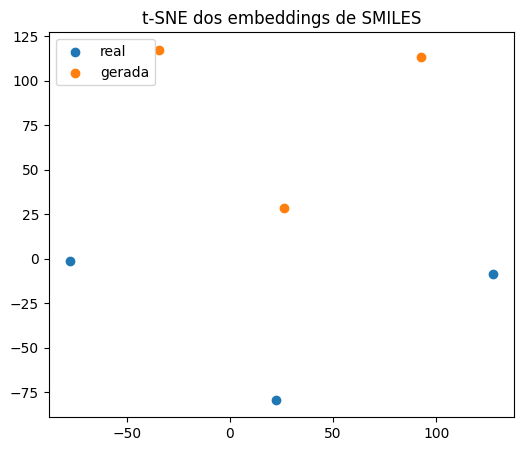

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

all_embeddings = np.vstack([gen_embeddings, real_embeddings])
labels = ['gerada'] * len(gen_embeddings) + ['real'] * len(real_embeddings)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced = tsne.fit_transform(all_embeddings)

plt.figure(figsize=(6,5))
for label in set(labels):
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(reduced[idx, 0], reduced[idx, 1], label=label)
plt.legend()
plt.title("t-SNE dos embeddings de SMILES")
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw


#smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
smiles = "CC(=O)Nc1nnc(S(N)(=O)=O)s1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)


#Tanimoto + vactor sem smiles.


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
import selfies as sf
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import random

# ✅ Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# ✅ Convertemos SMILES para SELFIES
for d in data:
    d["selfies"] = sf.encoder(d["scaffold"])

# ✅ Construção do vocabulário SELFIES
all_chars = set()
for d in data:
    tokens = list(sf.split_selfies(d["selfies"]))
    all_chars.update(tokens)

char2idx = {c: i + 1 for i, c in enumerate(sorted(all_chars))}
char2idx["<pad>"] = 0
idx2char = {i: c for c, i in char2idx.items()}

# 1. Carregar modelo
encoder = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 2. Calcular embeddings
indication_texts = [d["indication"] for d in data]
indication_embeddings = encoder.encode(indication_texts)


class ScaffoldDataset(Dataset):
    def __init__(self, data, indication_embeddings, char2idx, max_len=40):
        self.data = data
        self.embeddings = indication_embeddings  # embeddings já calculados
        self.char2idx = char2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Embedding da indicação já está pronto
        vec = self.embeddings[idx]

        # Tokenização da SELFIES
        target = [self.char2idx[c] for c in sf.split_selfies(self.data[idx]["selfies"])]
        if len(target) < self.max_len:
            target += [self.char2idx["<pad>"]] * (self.max_len - len(target))
        else:
            target = target[:self.max_len]

        return torch.tensor(vec, dtype=torch.float32), torch.tensor(target)

# 3. Passar para o dataset
dataset = ScaffoldDataset(data, indication_embeddings, char2idx)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


# ✅ Modelo Transformer: indication → SELFIES
class ScaffoldTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, vocab_size, max_len=40):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, hidden_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.out = nn.Linear(hidden_size, vocab_size)
        self.max_len = max_len

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, self.max_len, 1) + self.pos_embedding[:, :self.max_len, :].to(device)
        x = self.transformer(x)
        return self.out(x)


model = ScaffoldTransformer(X.shape[1], 128, len(char2idx)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
loss_fn = nn.CrossEntropyLoss()

loss_ = []
# ✅ Treinamento
for epoch in range(2000):
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        loss = loss_fn(out.view(-1, out.shape[-1]), y.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")
        loss_.append(loss.item())


In [ ]:
#!pip install rdkit-pypi
!pip install selfies

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys
import numpy as np

# SMILES da molécula
smiles = "CC(=O)Oc1ccccc1C(=O)O"  # exemplo: aspirina

# Converter para objeto mol
mol = Chem.MolFromSmiles(smiles)

# Morgan fingerprint (ECFP4, raio 2, 2048 bits)
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
morgan_array = np.array(morgan_fp)

# MACCS keys (166 bits)
maccs_fp = MACCSkeys.GenMACCSKeys(mol)
maccs_array = np.array(maccs_fp)

print("Morgan FP (array):", morgan_array)
print("MACCS keys (array):", maccs_array)


#ScaffoldLLM - (LLM que gera scaffolds/fingerprints a partir de indicações)

In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
import selfies as sf
from rdkit import Chem
from rdkit.Chem import QED, Crippen, AllChem
import random


# ✅ Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ✅ Geração dos Morgan Fingerprints
for d in data:
    mol = Chem.MolFromSmiles(d["scaffold"])
    if mol:
        d["fp"] = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    else:
        d["fp"] = None  # descarta depois

# ✅ Filtra apenas os válidos
data = [d for d in data if d["fp"] is not None]


# ✅ Embeddings
encoder = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
indication_embeddings = encoder.encode([d["indication"] for d in data])

# ✅ Dataset atualizado
class FingerprintDataset(Dataset):
    def __init__(self, data, indication_embeddings):
        self.data = data
        self.embeddings = indication_embeddings

    def __len__(self): return len(self.data)

    def __getitem__(self, idx):
        vec = self.embeddings[idx]
        target_fp = list(self.data[idx]["fp"])
        return torch.tensor(vec, dtype=torch.float32), torch.tensor(target_fp, dtype=torch.float32)


dataset = FingerprintDataset(data, indication_embeddings)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# ✅ Modelo atualizado para prever fingerprint
class FingerprintGenerator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=2048):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_size, nhead=4, batch_first=True), num_layers=2
        )
        self.out = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x).unsqueeze(1).repeat(1, 1, 1)  # [B, 1, H]
        x = self.transformer(x)
        x = self.out(x.squeeze(1))  # [B, 2048]
        return self.sigmoid(x)


# ✅ Inicialização
input_dim = indication_embeddings[0].shape[0]
model = FingerprintGenerator(input_dim, 128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.BCELoss()

#model.load_state_dict(torch.load("/content/scaffold_transformer_rl.pth", map_location=device))

"""
# ✅ Decodificação SELFIES
def decode_selfies(indices):
    tokens = [idx2char[i] for i in indices if i in idx2char and i != char2idx["<pad>"]]
    selfies = "".join(tokens)
    try:
        smiles = sf.decoder(selfies)
    except:
        smiles = ""
    return smiles
"""


# ✅ Recompensa
def calc_reward(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return 0.0
    qed = QED.qed(mol)
    logp = Crippen.MolLogP(mol)
    return qed + 0.1 * logp  # Exemplo de recompensa combinada


# ✅ Loop de Reinforcement Learning
def reinforce_step(model, optimizer, batch_size=4):
    model.train()
    log_probs, rewards = [], []

    for _ in range(batch_size):
        idx = random.randint(0, len(data) - 1)
        emb = torch.tensor(indication_embeddings[idx], dtype=torch.float32).unsqueeze(0).to(device)
        output = model(emb)

        # Amostragem binária
        probs = output
        dist = torch.distributions.Bernoulli(probs)
        sampled = dist.sample()
        log_prob = dist.log_prob(sampled)

        # Não temos como converter fingerprint para SMILES diretamente.
        # Então usamos o SMILES verdadeiro da entrada como proxy para reward.
        smiles = data[idx]["scaffold"]
        reward = calc_reward(smiles)

        log_probs.append(log_prob.sum())
        rewards.append(torch.tensor(reward, dtype=torch.float32).to(device))

    loss = -torch.stack(log_probs) * torch.stack(rewards)
    loss = loss.mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item(), rewards

for epoch in range(100):
    model.train()
    if epoch % 10 != 0:
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = loss_fn(out, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"[Epoch {epoch}] Supervised Loss: {loss.item():.4f}")
    else:
        rl_loss, rewards = reinforce_step(model, optimizer)
        avg_reward = torch.tensor(rewards).mean().item()
        print(f"[Epoch {epoch}] RL Loss: {rl_loss:.4f} | Avg Reward: {avg_reward:.4f}")


torch.save({"epoch": epoch,"model_state": model.state_dict(),"optimizer_state": optimizer.state_dict(),}, "checkpoint_rl.pth")
torch.save(model.state_dict(), "scaffold_transformer_rl.pth")

In [ ]:
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import ExplicitBitVect

# ✅ Embeddings
encoder = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2") ##llm
indication_embeddings = encoder.encode([d["indication"] for d in data])

def generate_fingerprint(indication):
    model.eval()
    x = encoder.encode([indication])
    x = torch.tensor(x, dtype=torch.float32).to(device)

    with torch.no_grad():
        out = model(x)
        fingerprint = (out > 0.9).int().squeeze(0).cpu().numpy()  # binário

    # Converte array binário para ExplicitBitVect
    fp_model = ExplicitBitVect(len(fingerprint))
    for i, bit in enumerate(fingerprint):
        if bit:
            fp_model.SetBit(i)

    # Busca molécula mais similar no dataset
    best_sim = -1
    best_mol = None
    best_smiles = None

    for d in data:
        ref_fp = d["fp"]
        sim = DataStructs.TanimotoSimilarity(fp_model, ref_fp)
        if sim > best_sim:
            best_sim = sim
            best_mol = Chem.MolFromSmiles(d["scaffold"])
            best_smiles = d["scaffold"]

    if best_mol:
        print(f"\n📌 Indication: {indication}")
        print(f"🔬 Matched SMILES: {best_smiles}")
        print(f"🔁 Tanimoto Similarity: {best_sim:.4f}")
        img = Draw.MolToImage(best_mol, size=(300, 300))
        display(img)
    else:
        print("❌ Nenhuma molécula semelhante encontrada.")



📌 Indication: Hypertension
🔬 Matched SMILES: C1CCCC1
🔁 Tanimoto Similarity: 0.6667


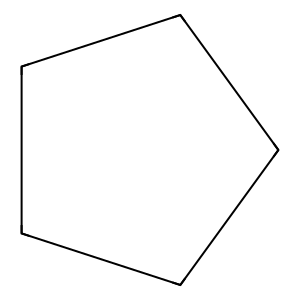


📌 Indication: Cardiovascular Diseases
🔬 Matched SMILES: C1CCCC1
🔁 Tanimoto Similarity: 0.6667


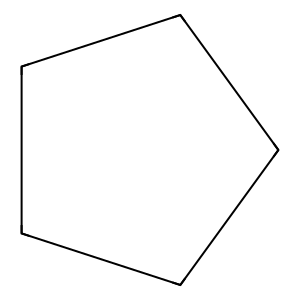


📌 Indication: Diabetes Mellitus | Type 2
🔬 Matched SMILES: C1CCCC1
🔁 Tanimoto Similarity: 0.6667


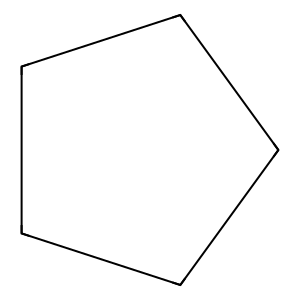


📌 Indication: Diabetes Mellitus
🔬 Matched SMILES: C1CCCC1
🔁 Tanimoto Similarity: 0.6667


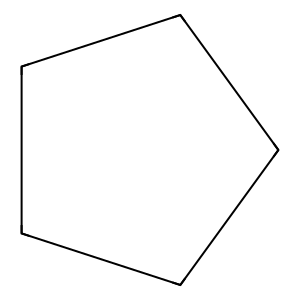

In [ ]:
generate_fingerprint("Hypertension")
generate_fingerprint("Cardiovascular Diseases")

generate_fingerprint("Diabetes Mellitus | Type 2")
generate_fingerprint("Diabetes Mellitus")



In [ ]:
generate_fingerprint("Metal Metabolism, Inborn Errors")